<a href="https://colab.research.google.com/github/jakkulaharini/CRT2024/blob/main/Netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import files
uploaded = files.upload()

Saving netflix.csv to netflix.csv


In [25]:
df = pd.read_csv("netflix.csv")

df['cast'] = df['cast'].fillna('Unknown Actor')
df['director'] = df['director'].fillna('Unknown Director')
df['country'] = df['country'].fillna('Unknown Country')
df['rating'] = df['rating'].fillna('Unknown Rating')
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['duration'] = df['duration'].fillna('0')
df['year_added'] = df['date_added'].dt.year

In [7]:
print("\nValue counts for 'type':")
print(df['type'].value_counts())

print("\nValue counts for 'rating':")
print(df['rating'].value_counts())

print("\nValue counts for 'country':")
print(df['country'].value_counts().head(10))


Value counts for 'type':
type
Movie      6131
TV Show    2676
Name: count, dtype: int64

Value counts for 'rating':
rating
TV-MA             3207
TV-14             2160
TV-PG              863
R                  799
PG-13              490
TV-Y7              334
TV-Y               307
PG                 287
TV-G               220
NR                  80
G                   41
TV-Y7-FV             6
Unknown Rating       4
NC-17                3
UR                   3
66 min               1
74 min               1
84 min               1
Name: count, dtype: int64

Value counts for 'country':
country
United States      2818
India               972
Unknown Country     831
United Kingdom      419
Japan               245
South Korea         199
Canada              181
Spain               145
France              124
Mexico              110
Name: count, dtype: int64


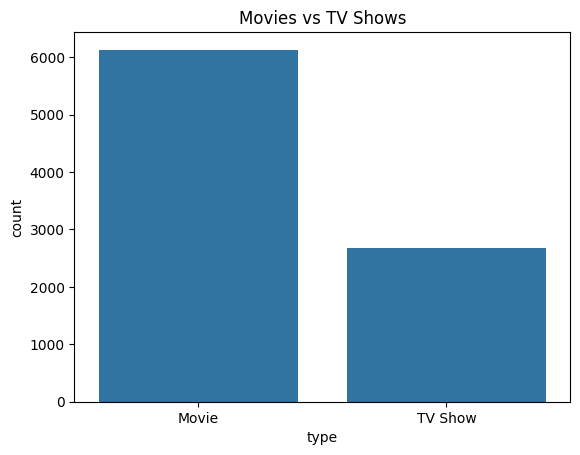

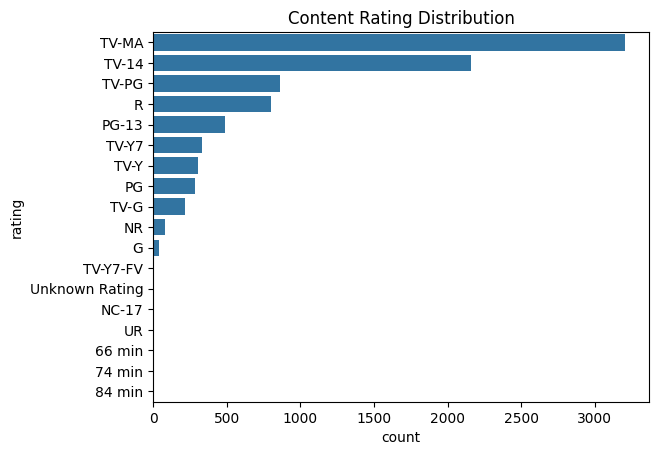

In [8]:
sns.countplot(data=df, x='type')
plt.title("Movies vs TV Shows")
plt.show()

sns.countplot(data=df, y='rating', order=df['rating'].value_counts().index)
plt.title("Content Rating Distribution")
plt.show()

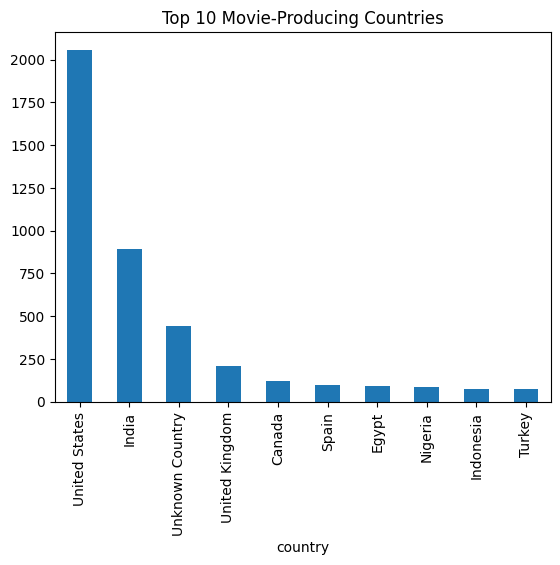

In [9]:
# Movies
movie_df = df[df['type'] == 'Movie']
top_movie_countries = movie_df.groupby('country')['title'].nunique().sort_values(ascending=False).head(10)
top_movie_countries.plot(kind='bar', title='Top 10 Movie-Producing Countries')
plt.show()

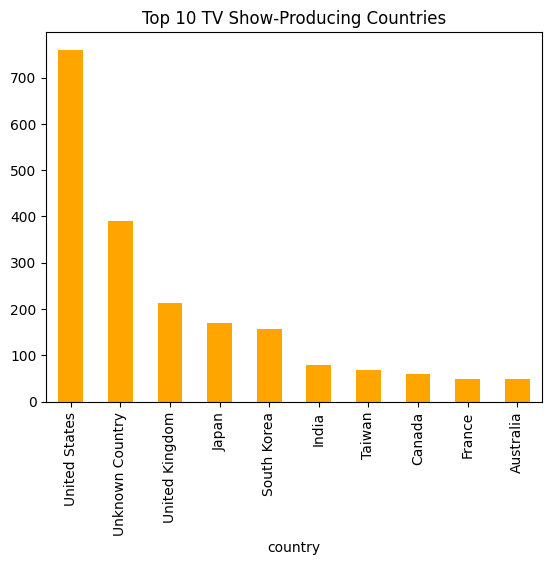

In [10]:
#TV Shows
tv_df = df[df['type'] == 'TV Show']
top_tv_countries = tv_df.groupby('country')['title'].nunique().sort_values(ascending=False).head(10)
top_tv_countries.plot(kind='bar', color='orange', title='Top 10 TV Show-Producing Countries')
plt.show()

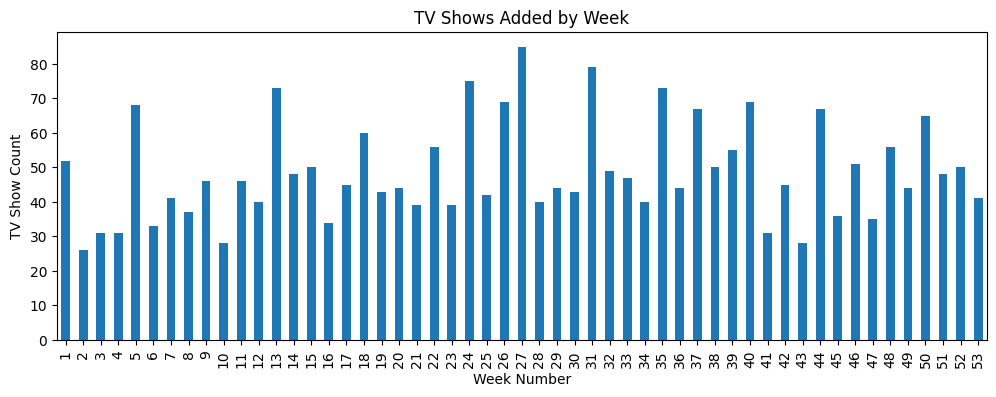

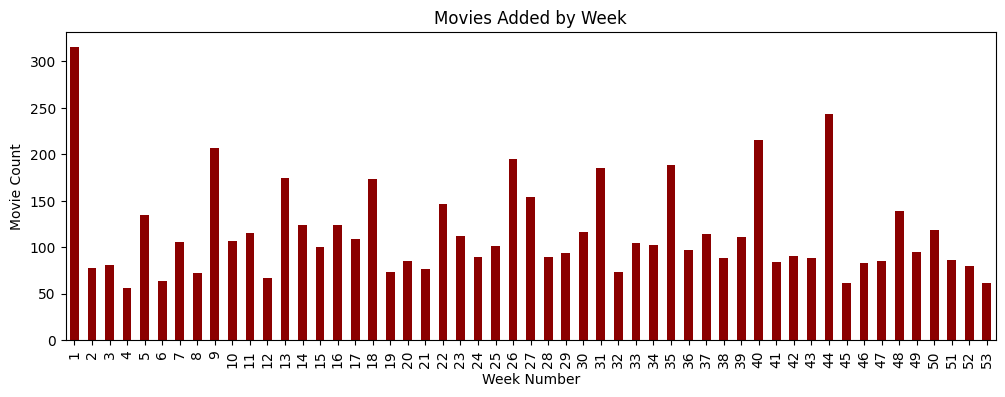

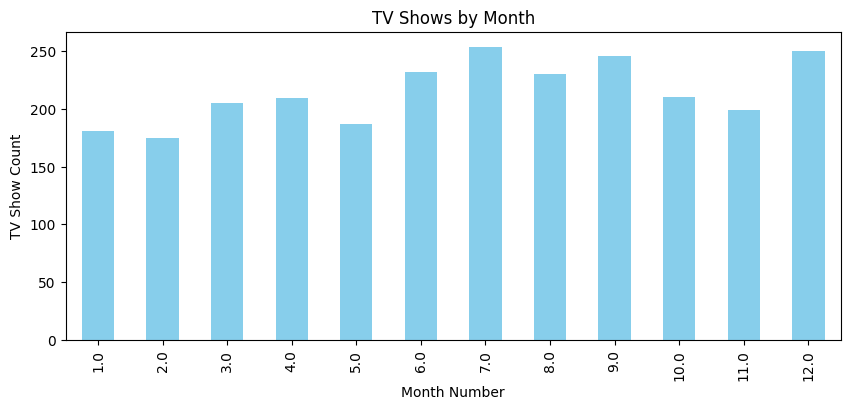

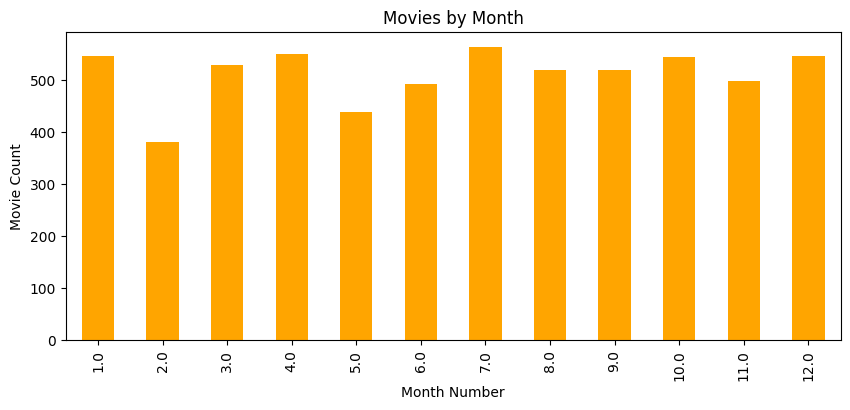

In [20]:
# ✅ Best Time to Release (Week and Month)

# Add week and month columns to the main DataFrame
df['week'] = df['date_added'].dt.isocalendar().week
df['month'] = df['date_added'].dt.month

# Create fresh copies to avoid SettingWithCopyWarning
movie_df = df[df['type'] == 'Movie'].copy()
tv_df = df[df['type'] == 'TV Show'].copy()

# 🎯 Weekly Analysis
plt.figure(figsize=(12,4))
tv_df['week'].value_counts().sort_index().plot(kind='bar', title='TV Shows Added by Week')
plt.xlabel("Week Number")
plt.ylabel("TV Show Count")
plt.show()

plt.figure(figsize=(12,4))
movie_df['week'].value_counts().sort_index().plot(kind='bar', color='darkred', title='Movies Added by Week')
plt.xlabel("Week Number")
plt.ylabel("Movie Count")
plt.show()

# 📆 Monthly Analysis
plt.figure(figsize=(10,4))
tv_df['month'].value_counts().sort_index().plot(kind='bar', title='TV Shows by Month', color='skyblue')
plt.xlabel("Month Number")
plt.ylabel("TV Show Count")
plt.show()

plt.figure(figsize=(10,4))
movie_df['month'].value_counts().sort_index().plot(kind='bar', title='Movies by Month', color='orange')
plt.xlabel("Month Number")
plt.ylabel("Movie Count")
plt.show()



Top 10 Actors:
 cast
Unknown Actor       825
Anupam Kher          43
Shah Rukh Khan       35
Julie Tejwani        33
Naseeruddin Shah     32
Takahiro Sakurai     32
Rupa Bhimani         31
Om Puri              30
Akshay Kumar         30
Yuki Kaji            29
Name: count, dtype: int64


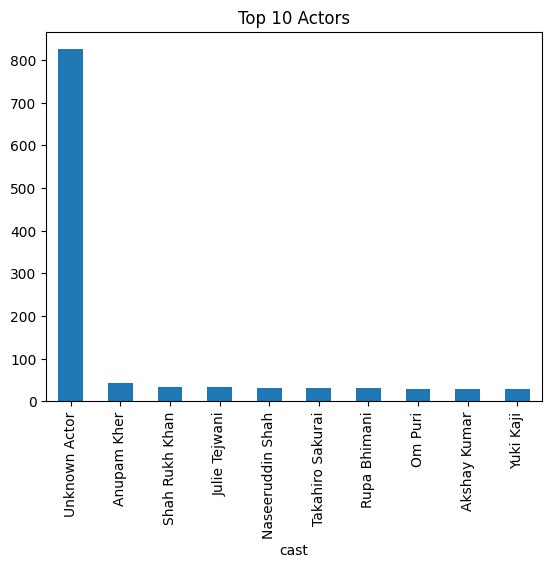

In [16]:
#Top 10 Actors
df_cast = df.copy()
df_cast['cast'] = df_cast['cast'].str.split(', ')
df_cast = df_cast.explode('cast')
top_actors = df_cast['cast'].value_counts().head(10)
print("\nTop 10 Actors:\n", top_actors)
top_actors.plot(kind='bar', title='Top 10 Actors')
plt.show()



Top 10 Directors:
 director
Unknown Director          2634
Rajiv Chilaka               19
Raúl Campos, Jan Suter      18
Suhas Kadav                 16
Marcus Raboy                16
Jay Karas                   14
Cathy Garcia-Molina         13
Martin Scorsese             12
Youssef Chahine             12
Jay Chapman                 12
Name: count, dtype: int64


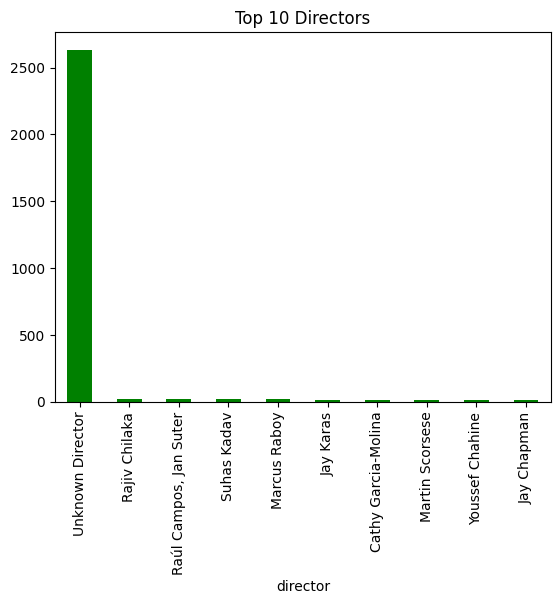

In [17]:
#Top 10 Directors
top_directors = df['director'].value_counts().head(10)
print("\nTop 10 Directors:\n", top_directors)
top_directors.plot(kind='bar', color='green', title='Top 10 Directors')
plt.show()

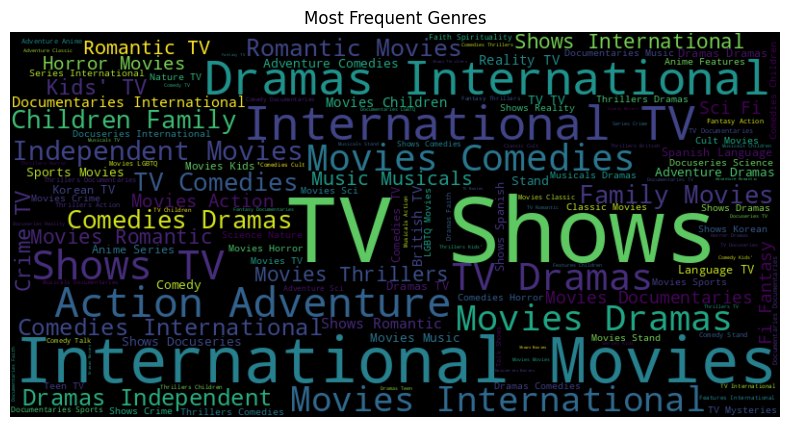

In [18]:
# Genre Word Cloud

text = ' '.join(df['listed_in'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Frequent Genres")
plt.show()


 Most content is added to Netflix about 334.0 days after release.


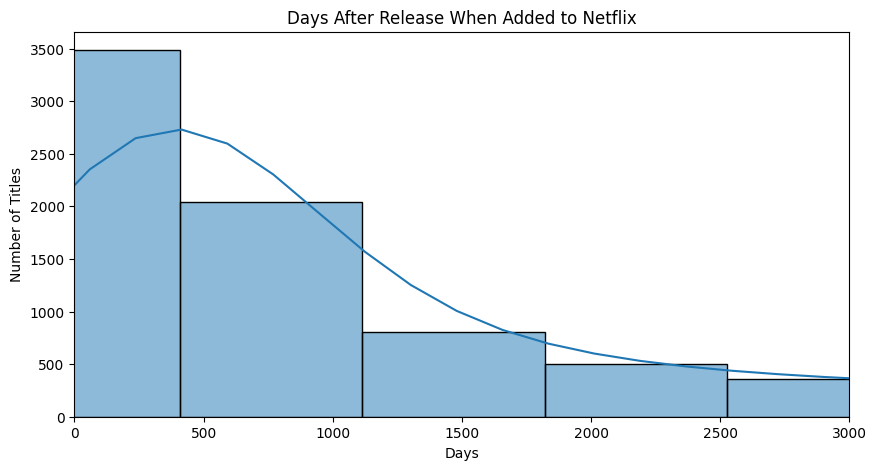

In [22]:
# Time Difference in Days Between Release and Add Date
# First create a full release date column (using just Jan 1 if only year is given)
df['release_date'] = pd.to_datetime(df['release_year'].astype(str) + '-01-01', errors='coerce')

# Calculate the exact time difference in days
df['days_to_add'] = (df['date_added'] - df['release_date']).dt.days

# Drop nulls before calculating mode
mode_days = df['days_to_add'].dropna().mode()[0]
print(f"\n Most content is added to Netflix about {mode_days} days after release.")

# Plot histogram
plt.figure(figsize=(10, 5))
sns.histplot(df['days_to_add'].dropna(), bins=50, kde=True)
plt.title("Days After Release When Added to Netflix")
plt.xlabel("Days")
plt.ylabel("Number of Titles")
plt.xlim(0, 3000)  # Adjust as needed
plt.show()
